### Albumentation

In [19]:

from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [30]:
# def download_image(url):
#     data = urlopen(url).read()
#     data = np.frombuffer(data, np.uint8)
#     image = cv2.imdecode(data, cv2.IMREAD_COLOR)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     return image
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def read_img(path_img):
    img = cv2.imread(path_img)[:,:,::-1]
    return img

def show_img (img): 
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()

In [31]:
path_img = '/home/manhduy/Documents/model_DL/envData_Augmentation/Imgaug_albumentation/images/image_3.jpg'

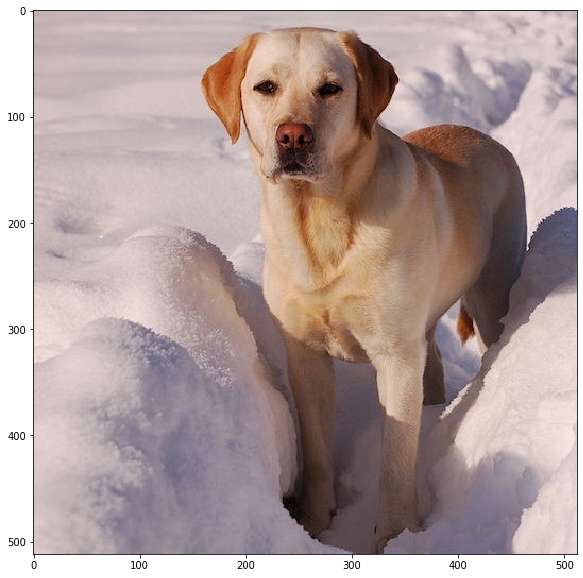

In [33]:
image = read_img(path_img)
show_img(image)

In [34]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

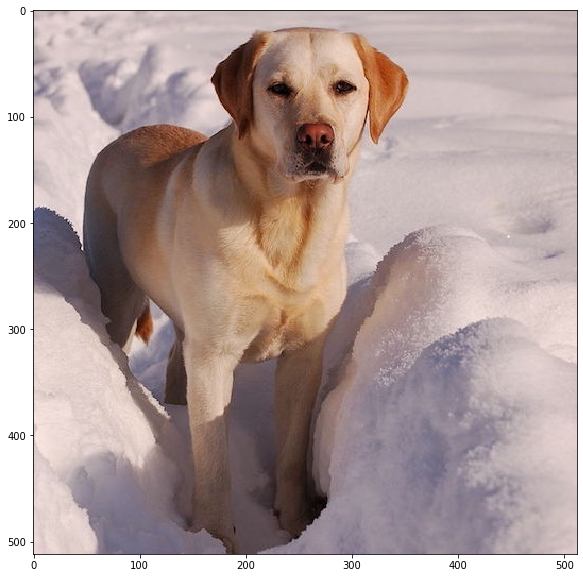

In [35]:
aug = HorizontalFlip(p =1)
augment_and_show(aug, image)

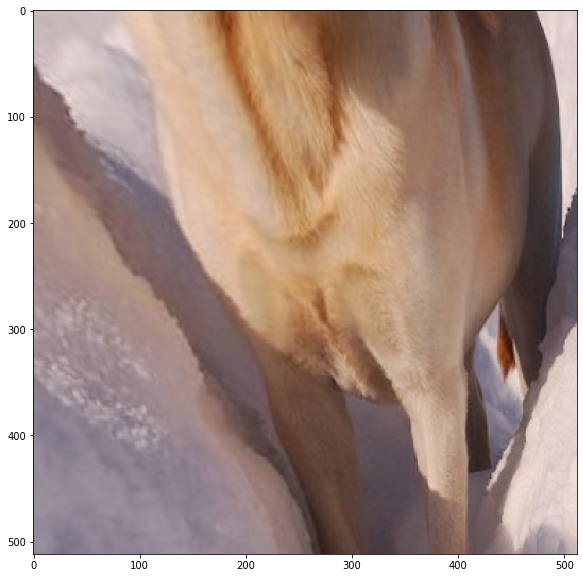

In [43]:
aug = IAAPerspective(scale=0.2, p=1)
augment_and_show(aug, image)

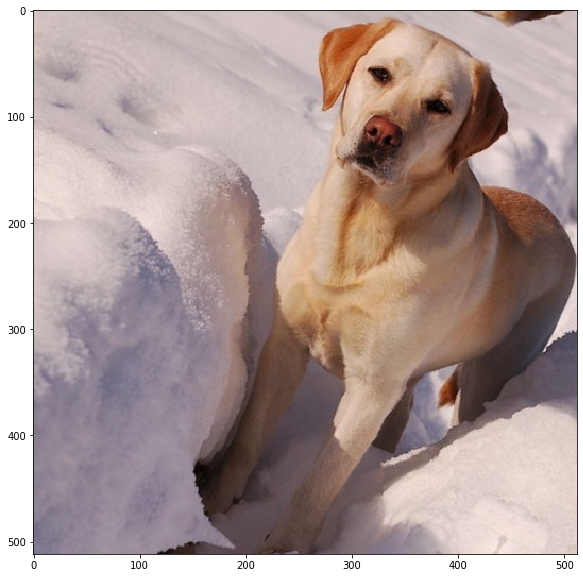

In [44]:
aug = ShiftScaleRotate(p=1)
augment_and_show(aug, image)

In [45]:

def augment_flips_color(p=.5):
    return Compose([
        CLAHE(),
        RandomRotate90(),
        Transpose(),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
        Blur(blur_limit=3),
        OpticalDistortion(),
        GridDistortion(),
        HueSaturationValue()
    ], p=p)

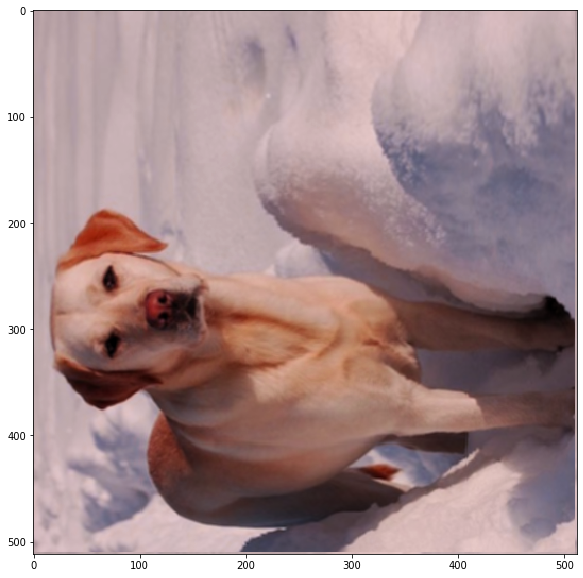

In [46]:
aug = augment_flips_color(p=1)
augment_and_show(aug, image)

In [47]:

def strong_aug(p=.5):
    return Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),            
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], p=p)

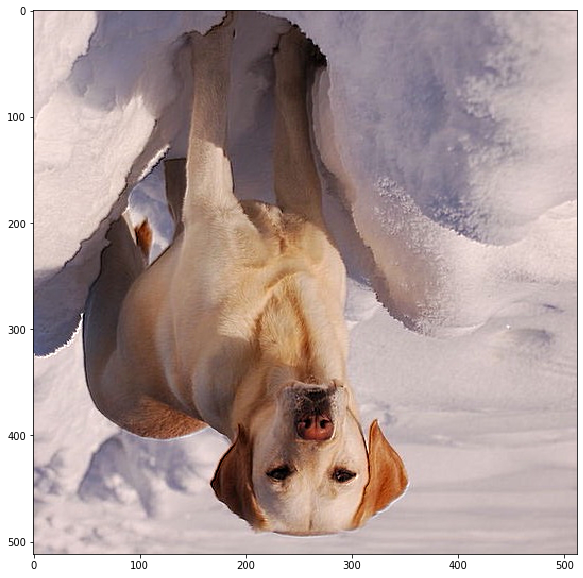

In [48]:
aug = strong_aug(p=1)
augment_and_show(aug, image)